- 데이터 포인트들을 별개의 군집으로 그룹화 하는것을 의미함
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 그룹화 함

K-Means Clustering
- 군집 중심점(Centroid) 기반 클러스터링
  1. 2개의 군집 중심점을 설정
  2. 각 데이터들은 가장 가까운 중심점에 소속
  3. 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
  4. 각 데이터들은 이동된 중심점 기준으로 가장 가까운 중심점에 소속
  5. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
  6. 중심점을 이동하였지만 데이터들의 중심점 소속 변경이 없으면 군집화 완료

- 장점
  - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
  - 쉽고 간결
  - 대용량 데이터에도 활용 가능
- 단점
  - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
  - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려짐
  - 이상치(Outlier) 데이터에 취약함

사이킷런 KMeans 클래스 주요 파라미터
- n_clusters : 군집화할 개수. 즉, 군집 중심점의 개수를 의미함
- init : 초기에 군집 중심점의 좌표를 설정할 방식, 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정함
- max_iter : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함

주요 속성
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음


K-Means를 이용한 Iris 데이터 셋 Clustering

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepla_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepla_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# KMeans 객체를 생성하고 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [3]:
# labels_속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid) 확인. cluster 컬럼 추가
print(kmeans.labels_)
irisDF.shape, kmeans.labels_.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


((150, 4), (150,))

In [0]:
irisDF['cluster'] = kmeans.labels_

In [5]:
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepla_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


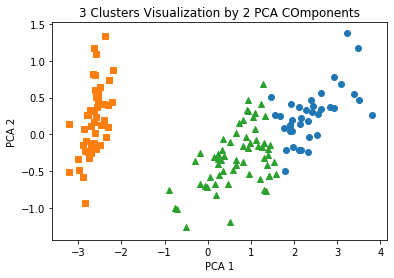

In [7]:
# cluster 값이 0, 1, 2인 경우마다 별도의 index로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# cluster 값이 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1'); plt.ylabel('PCA 2'); plt.title('3 Clusters Visualization by 2 PCA COmponents')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- n_samples : 생성할 총 데이터의 개수. default=100
- n_features : 데이터의 피처 개수. 시각화를 위해 2개로 설정해서 1번째 피처는 x좌표, 2번째 피처는 y좌표상에 표현함
- centers : int값. 예를 들면, 3으로 설정하면 군집의 개수를 나타냄. ndarray형태로 표현할 경우 개별 군집 중심점의 좌표를 의미함
- cluster_std : 생성될 군집 데이터의 표준 편차. 
  - float값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐
  - [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫번째 군집 내 데이터의 표준 편차는 0.8, 두번째 군집 내 데이터의 표준 편차는 1.2, 세번째 군집 내 데이터의 표준편차는 0.6으로 만듦
  - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용함

In [9]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


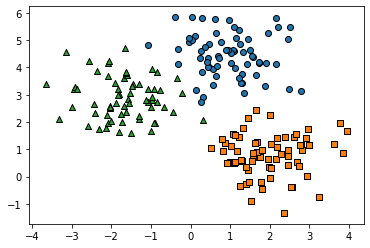

In [10]:
target_list = np.unique(y)
# 각 target 별 scatter plot의 marker 값들
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target'] == target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

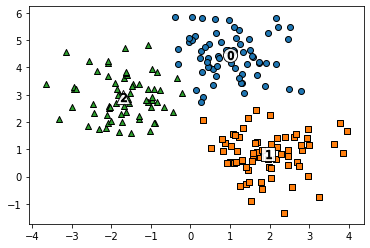

In [11]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
